# <div class="alert alert-info" style="color:red">&emsp;&emsp;&emsp;&emsp;EXPLORE Data Science Academy Classification Hackathon
</div>

# Sqiniseko Sizwe Gift Nhlenyama

# Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government

In [1]:
%%html
<img src="nunu.jpg" alt="alternatetext">

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Sentiment Analysis</a>

<a href=#five>5. Data Processing and Engineering </a>

<a href=#six>6. Featur Engineering </a>

<a href=#seven>7.Modeling Building </a>

<a href=#eight>8.Model Performance </a>

<a href=#nine>9. References</a>

<a href=#nine>10. Export</a>

<a href=#nine>11. References</a>






 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we import the required Classes and libraries that will assist us in the classfication of the data |

---

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn import metrics

import string 
import pandas as pd

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stop = stopwords.words('english')
# Packages for data analysis
import numpy as np
import pandas as pd
from time import time
import html    

# Packages for visualisations
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
import time

# Packages for preprocessing
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.probability import FreqDist
import emoji
from ftfy import fix_text
from spellchecker import SpellChecker 
from nltk.stem.snowball import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import itertools
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

# Packages for training models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB


# Packages for hyperparameter optimisation
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
# Packages for evaluating model accuracy
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
from sklearn.svm import LinearSVC, SVC
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Packages for saving models
import pickle





[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\F5480264\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [131]:
#pip install shap

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are loading the data from the `df_train` and `df_test` file into a DataFrame. |

---

In [132]:
# Load Data
df_train = pd.read_csv('train_set.csv')
df_test =pd.read_csv('test_set.csv')

In [133]:
df_train.head(11)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo
2,eng,the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3,nso,o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go šomela go phela gabotse bjbj
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u thetshelesa mbilaelo dzine dza tshimbilelana na tshialula u ya nga mbeu nahone i ivhea sa foramu ya thungo u ya nga mulayo wa ndinganyiso
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga di tla lebelela diphetogo tša mebaraka ya mešomo le mekgwa ga mmogo le go thapiwa mešomong ka makaleng ao mešomo ao lego molaong le ao a sego molaong le go hloka me omo
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tshekong go ya ka temana ya a e tshwanetse kwa ntle ga fa kgetse e tsholotswe kgotsa e fetiseditswe kwa kgotlatshekelo ya bana ya fetisediwa kwa kgotlatshekelo ya bosiamisi ya ngwana gore a ikarabele mo tatofatsong le go sekiwa ga kgetse go ya ka kgaolo ya
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele apo a khothe ya madzhisitirata lihoro line la si vhe na mulandu li do vha lone line la wana masheleni ngeno lihoro le la wanwa mulandu li tshi do vha lone line la tea u lifha ayo masheleni o laelwaho nga khothe
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le mongwe go tonakgolo le go thteramelao ya profense malebana le taolo ya dipotfolio tša bona mme maloko a mangwe ka moka a khuduthamaga le wona bjalo a ikrabela ka seboka mabapi le phethagatšo ya mediro ya mmušo wa profense le go merero ya wona
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha lesedi le le benyabenyang le le bogale jo bo dirang gore le kgone go bonwa ke motho yo o bonang sentle mo leseding le le tlwaelegileng mo sekgaleng sa dimitara di le


***The number of Rows and Columns in our dataset***

In [134]:
#Train data shape
df_train.shape

(33000, 2)

In [135]:
#Test data shape
df_test.shape

(5682, 2)

In [136]:
#find out the number of each datatype in our data 
print(df_train.dtypes.value_counts())

object    2
dtype: int64


---
We observe that that the respective datasets have ***33000*** and ***5682*** rows respectively

---

In [100]:
len(df_train)

33000

In [101]:
len(list(df_train.lang_id.unique()))

11

___We have observed that there are 11 official Languages in the Replublic of South African___

In [102]:
unique_lang = list(df_train.lang_id.unique())
print(unique_lang)

['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']


### Language Description
*  **xho :**     Xhosa 
*  **eng :**     English 
*  **nso :**     Nsowiki 
*  **ven :**     Venda  
*  **tsn :**     Tswana 
*  **nbl :**     Ndebele 
*  **zul :**     IsiZulu 
*  **ssw :**     Swazi 
*  **tso :**     Tsonga 
*  **sot :**     SeSotho 
*  **afr :**     Afrikaans 

---

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


|  Description: Exploratory data Analysis |
| :--------------------------- |
| In this section we do sentiment analysis, and possibly create new features - as identified in the EDA phase. |

---

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


In [104]:
df_train.lang_id.value_counts()
    

xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: lang_id, dtype: int64

<AxesSubplot:>

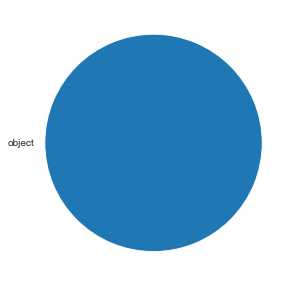

In [105]:
df_train.dtypes.value_counts().plot(kind='pie', ylabel="", figsize=(5,5))

&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;The entire dataset Consists of Strings/Object dataType

In [106]:
#checking for possible missing values
print(df_train.isnull().sum())


lang_id    0
text       0
dtype: int64


<div class="alert alert-warning" style="color:black">In the given dataset there are no missing values</div>

In [149]:
df_train.describe()

,lang_id,text
count,33000,33000
unique,11,29948
top,xho,ngokwesekhtjheni yomthetho ophathelene nalokhu unelungelo lokudlulisela isililo sakho kusomkhandlu wezehlalakuhle ngokutlola incwadi uyithumele e-adresini elandelako kungakapheli amalanga amatjhumi alithoba ukusukela mhlazana uthola incwadi le
freq,3000,17


The descibe function shows conspiciously that there are a lot of words in the ___Xhosa___ language within our dataset

with 11 unique language id's

3000 entries for all of the langauges(***Mode***)

Text(0.5, 0, 'LANGUAGES')

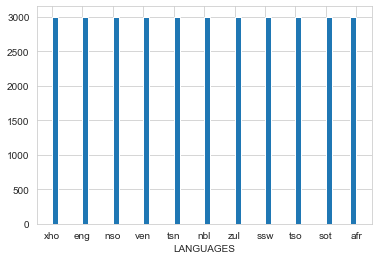

In [108]:
sns.set_style('whitegrid')
df_train['lang_id'].hist(bins=50)
plt.xlabel('LANGUAGES')

We Have observedd the our dataset is evenly distributed with all langauges have 3000 observations

<a id="five"></a>
## 5. Data Processing and Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [109]:
#nltk.download()


In [110]:
#pip install stop-words

#### <div class="alert alert-info" style="color:black">Looking at our data prior to processing it</div>



In [160]:
# View Data
pd.set_option('display.max_colwidth', 1)      # set to display full text in df
df_train['text'].head()

0    umgaqo-siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika                                            
1    i-dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga i-dha mayibize uncedo olufanelekileyo elungelweni layo            
2    the province of kwazulu-natal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3    o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la

In [113]:
def clean_series(text):
       return ''.join([l for l in text if l not in string.punctuation])


In [114]:
# Remove Punctutaion 
df_train['text'] = df_train['text'].apply(clean_series)
df_test['text'] =df_test['text'].apply(clean_series)

In [115]:
#lower strings
def clean_num(text):
    re.sub(r'http\S+', '', text)
    re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = text.lower()
    return text

In [116]:
df_train['text'] = df_train['text'].apply(clean_num)
df_test =df_test['text'].apply(clean_num)

#### <div class="alert alert-info" style="color:black">We observe if any changes where made to our data set</div>


In [117]:
# Verify Actions
pd.set_option('display.max_colwidth',1)
# set to display full text in df
df_train['text'].head()


0    umgaqosiseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika                                            
1    idha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga idha mayibize uncedo olufanelekileyo elungelweni layo             
2    the province of kwazulunatal department of transport invites tenders from established contractors experienced in bridge construction for the construction of the kwajolwayo tugela river pedestrian bridge near tugela ferry the duration of the project will be months
3    o netefatša gore o ba file dilo ka moka tše le dumelelanego ka tšona mohlala maleri a magolo a a šomišwago go fihlelela meagong e metelele scaffolds a a bolokegilego lefelo la maleba la go

           We have cleaned our data ensuring  we remove all numbers and punctuation within our text 
           there is a substancial difference compared to out uncleaned data

# Recover default matplotlib settings
import matplotlib as mpl

mpl.rcParams.update(mpl.rcParamsDefault)
%matplotlib inline

<a id="six"></a>
## 6. Feature Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
|  Description: Feature Engineering  |
| :--------------------------- |
| In this section, we create one or more classification models that are able to accurately classify if people believe in climate change or not. |

*We will be carrying out Feature Engineering in this section of our notebook. We have highlighted some key points to consider -

Why should we use Feature Engineering in data science?

Feature Selection/Importance

Handling missing values

Handling outliers

Feature Scaling ### Why engineer? In Data Science, the performance of the model is dependent on data preprocessing and data handling. 

Suppose if we build a model without Handling data, we got an accuracy of around 70%. By applying the Feature engineering on the same model there is a chance to increase the performance from 70% to more. Simply, by using Feature Engineering we improve the performance of the model

---

# <div class="alert alert-warning" style="color:black">&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;Text Cleaning</div>

<a id="seven"></a>
## 7. Modeling building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

1. We'll split the data into train and test, to be able to evaluate the model that we build on the train data.

In [137]:
# preparing our training X/text for vectorization
X = df_train['text']
y = df_train['lang_id']


#### preparing our testing X/text for vectorization

In [140]:
Xt=df_test['text']

### process of vectorization

In [141]:
#We then vectorize of text data 
count_vec = CountVectorizer(min_df=1,max_df=0.9,ngram_range=(1, 2))
X_vec = count_vec.fit_transform(X)
test_vec = count_vec.fit_transform(Xt)

### We will be spliting our test data and training data

0.17218 will be allocated testing the rest will be used to trained our models

we will be randomly shuffling through the data using 42 as our random state

In [151]:
# split data to Train/Test set
X_train, X_test, y_train, y_test= train_test_split(X_vec, y, test_size=0.17218, random_state=42)


***Training the BernoulliNB Model***

In [156]:
BernNB = BernoulliNB(alpha=1.0)
BernNB.fit(X_train, y_train)
print(BernNB)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))



BernoulliNB()
0.9992960225272791


#### <div class="alert alert-info" style="color:black">Training the ComplementNB Model</div>


In [157]:
from sklearn.naive_bayes import ComplementNB
comp = ComplementNB(alpha=0.01)
comp.fit(X_train, y_train)
print(print)

y_expect = y_test
y_pred = comp.predict(X_test)
print(accuracy_score(y_expect, y_pred))


<built-in function print>
0.9982400563181978


#### <div class="alert alert-info" style="color:black">Training the MultinomialNB Model</div>

In [158]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB
model = MultinomialNB(alpha=0.01,fit_prior=True, class_prior=None)
model.fit(X_train, y_train)
print(model)

y_expect = y_test
y_pred = model.predict(X_test)
print(accuracy_score(y_expect, y_pred))



MultinomialNB(alpha=0.01)
0.9989440337909187


#### <div class="alert alert-warning" style="color:black">Below we train the the StackingClassifier</div>

In [159]:
from sklearn.ensemble import StackingClassifier
sc = StackingClassifier(estimators =[('COMPLEMENT', comp),('MultinomialNB', model),
                                    ('Bernoulli', BernNB)],
    final_estimator= model,
    n_jobs=-1,
    passthrough=True)

In [ ]:
# First features and label 


#### We check the shape of the vectored test data

In [71]:
test_vec.shape


(5682, 104003)

<a id="seven"></a>
# 8. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

In [147]:
# Refining the train-test split for validation
sc.fit(X_train,y_train)
y_pred = sc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00       501
         eng       1.00      1.00      1.00       534
         nbl       1.00      1.00      1.00       520
         nso       1.00      1.00      1.00       539
         sot       1.00      1.00      1.00       534
         ssw       1.00      1.00      1.00       506
         tsn       1.00      1.00      1.00       498
         tso       1.00      1.00      1.00       482
         ven       1.00      1.00      1.00       551
         xho       1.00      1.00      1.00       518
         zul       1.00      1.00      1.00       499

    accuracy                           1.00      5682
   macro avg       1.00      1.00      1.00      5682
weighted avg       1.00      1.00      1.00      5682



We have used the staked the models and we have observed that the ***MultinomialNB***

# 9. Conclusion


We have sought to used the ***MultinomialNB*** because it has rendered the best results above 99%

# 10. Export

In [164]:
submission_df = pd.DataFrame(df_test['index'])

submission_df['lang_id'] = y_pred

submission_df.to_csv('FIGHT.csv', index=False)

# 11. Reference

<a href="https://athena.explore-datascience.net/">Athena</a>

<a href="https://unsplash.com/">Unsplash</a>

<a href="https://www.kaggle.com/">Kaggle</a>

<a href="https://github.com/">GitHub</a>






In [166]:
%%html
<img src="data-science-coding-courses.jpg" alt="alternatetext">